In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment4(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=1000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp4', T=T)
    exp_MAB_1.segments_means(param1=3,param2=6)
    df, df2 = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df, df2

In [3]:
#changeable parameters
np.random.seed(5566)
price_list=np.linspace(0.01,1,20)
T = 2000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 5
exp_MAB_1, df, df2 = set_experiment4(price_list=price_list, segments=segments, update_freq =10, T=T)

The highest true optimal is 9
The lowest true optimal is: 3
time: 28.14600419998169


In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, eg_p= 0.01, window_width=100)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

Reward change detected at time: 429
Detected Sign: -1
Reward change detected at time: 462
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 492
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 514
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 649
Detected Sign: -1
Reward change detected at time: 867
Detected Sign: 1
Detector cooling
Reward change detected at time: 916
Detected Sign: 1
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 938
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 960
Detected Sign: 1
arm
0.0     6.654438e-02
1.0     3.732852e-03
2.0     1.000000e+00
3.0     6.293376e-01
4.0     1.623868e-13
5.0     7.375258e-01
6.0     2.145494e-01
7.0     7.500289e-01
8.0  

Reward change detected at time: 1316
Detected Sign: -1
eg triggered at  1376
arm
1.0     1.000000
4.0     0.036525
7.0     0.687188
8.0     0.526037
9.0     0.064863
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
arm
6.0     4.751105e-02
7.0     1.280336e-04
8.0     9.712819e-43
17.0    1.000000e+00
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 1952
Detected Sign: 1
Detector cooling
Detector cooling
trial 3 IDS_1 time: 151.47120428085327
Reward change detected at time: 112
Detected Sign: 1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 154
Detected Sign: 1
Detector cooling
eg triggered at  294
arm
1.0     1.000000
4.0     1.000000
7.0     0.613124
8.0     0.601574
9.0     0.125511
11.0    0.334682
14.0    0.735579
17.0    0.205235
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
Detecto

In [5]:
#IDST_1
IDST_1_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, eg_p= 0.01, window_width=100)
    IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDST_1 time:',end-start)
    IDST_1_df = IDST_1_df.append([np.cumsum(IDST_1_re)])

Reward change detected at time: 440
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 539
Detected Sign: -1
Detector cooling
Reward change detected at time: 663
Detected Sign: -1
Reward change detected at time: 890
Detected Sign: 1
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 925
Detected Sign: 1
Detector cooling
Reward change detected at time: 967
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 1016
Detected Sign: -1
eg triggered at  1217
arm
1.0     1.000000e+00
4.0     6.690002e-13
5.0     5.239159e-70
6.0     2.117168e-21
7.0

eg triggered at  1176
arm
1.0     1.000000e+00
4.0     1.608415e-13
5.0     4.734354e-86
6.0     2.520215e-06
7.0     7.359649e-01
8.0     2.155548e-01
11.0    2.018327e-01
14.0    4.000792e-01
17.0    1.000000e+00
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 1491
Detected Sign: -1
Detector cooling
eg triggered at  1568
arm
1.0     0.252635
4.0     0.611345
5.0     0.754061
6.0     1.000000
7.0     0.472860
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 1607
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
eg triggered at  1655
arm
1.0     0.755891
3.0     0.103211
4.0     0.282114
7.0     0.141307
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, 

In [6]:
# UCB1 
UCB_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=1, bias=0, UCB1=True)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB time:',end-start)
    UCB_df = UCB_df.append([np.cumsum(UCB1_re)])
    
# UCBPI family
UCBPI_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCBPI = UCBPI_pull(price_list=price_list, segments=segments, c=4, bias=0, UCB1=False)
    UCBPI_sum, UCBPI_pt, UCBPI_re, UCBPI_arm = UCBPI.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCBPI time:',end-start)
    UCBPI_df = UCBPI_df.append([np.cumsum(UCBPI_re)])
    
# TS
TS_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    TS = TS_pull(price_list=price_list, est='MEAN')
    TS_sum, TS_pt, TS_re, TS_arm = TS.TS(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'TS time:',end-start)
    TS_df = TS_df.append([np.cumsum(TS_re)])

# EG
EG_df = pd.DataFrame()
EG_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.1)
    end = time.time()
    print('trial',i, 'EG time:',end-start)
    EG_df = EG_df.append([np.cumsum(EG_re)])

trial 0 UCB time: 0.9709620475769043
trial 1 UCB time: 0.9702520370483398
trial 2 UCB time: 0.9724581241607666
trial 3 UCB time: 1.3265869617462158
trial 4 UCB time: 1.0008256435394287
trial 0 UCBPI time: 1.2161619663238525
trial 1 UCBPI time: 0.9445188045501709
trial 2 UCBPI time: 0.945307731628418
trial 3 UCBPI time: 0.9536798000335693
trial 4 UCBPI time: 1.233947992324829
trial 0 TS time: 1.5420360565185547
trial 1 TS time: 1.5249590873718262
trial 2 TS time: 1.6027288436889648
trial 3 TS time: 1.563072919845581
trial 4 TS time: 1.5746452808380127
trial 0 EG time: 0.15279126167297363
trial 1 EG time: 0.1396620273590088
trial 2 EG time: 0.16686487197875977
trial 3 EG time: 0.151594877243042
trial 4 EG time: 0.15290188789367676


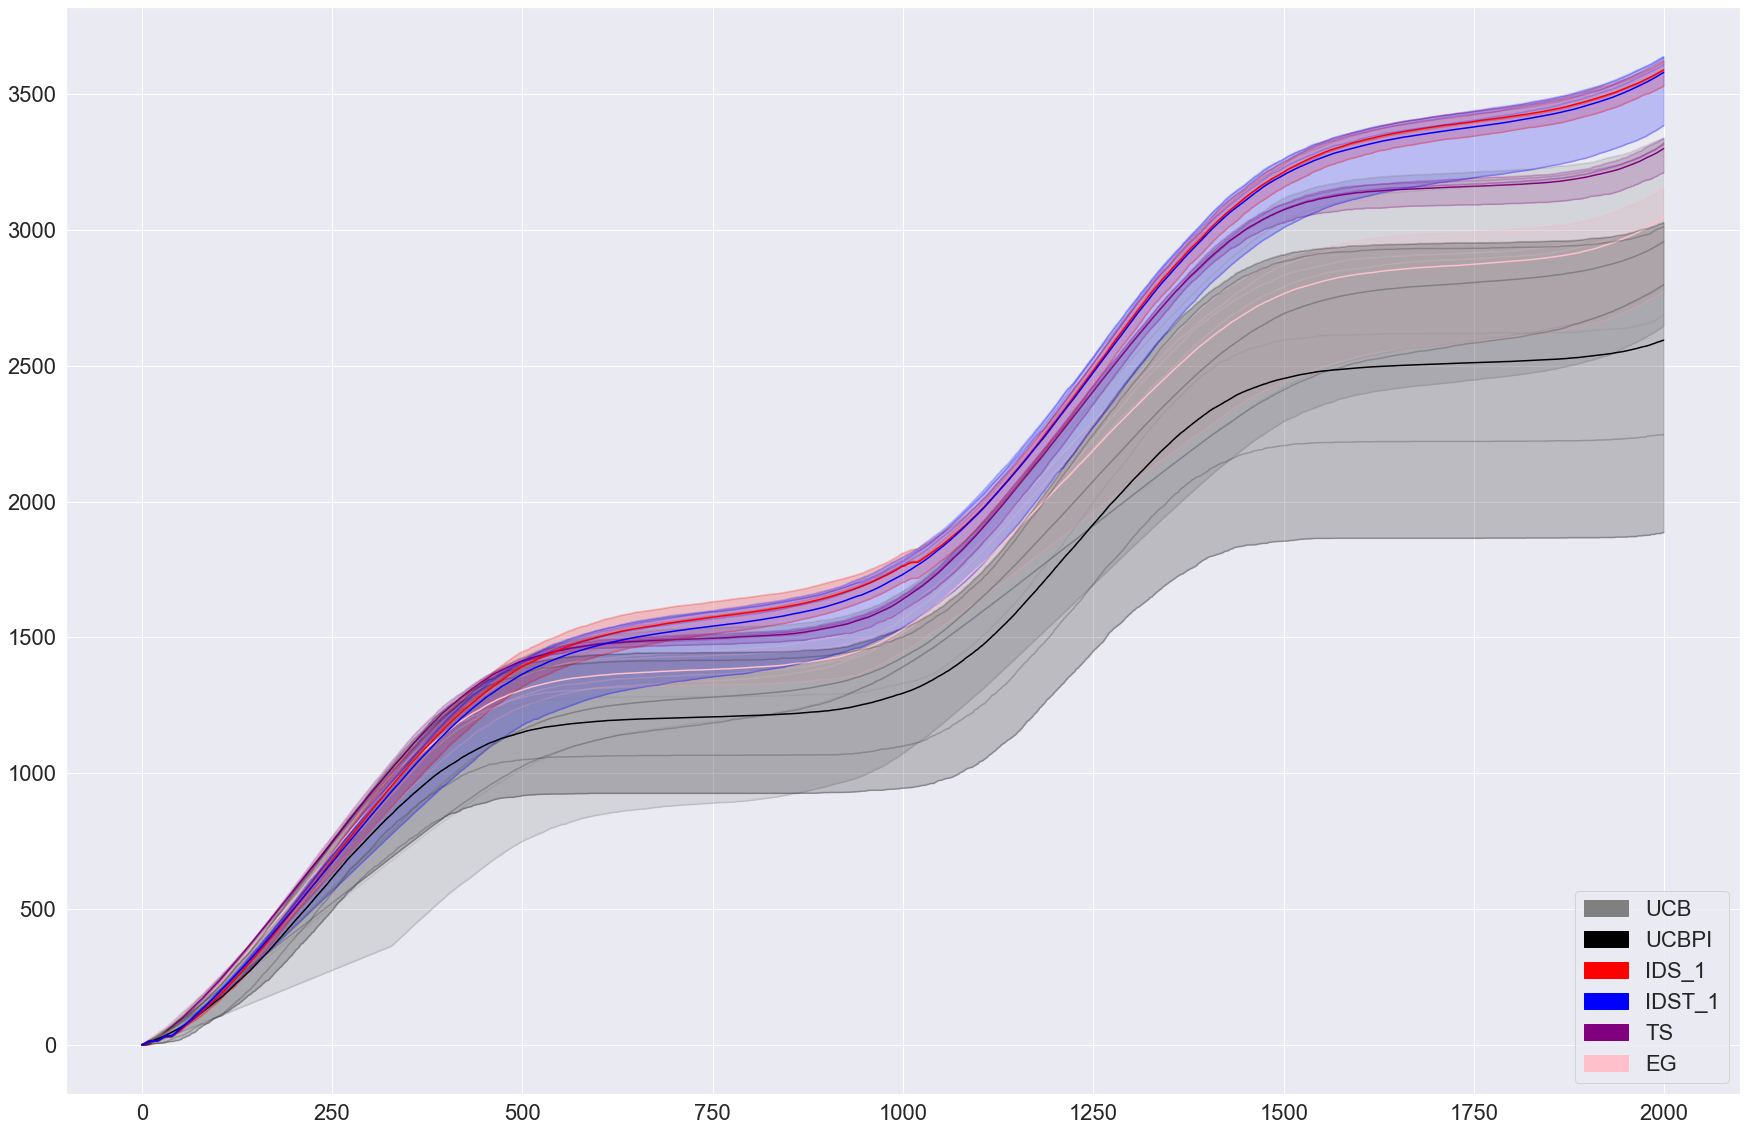

In [7]:
import matplotlib.patches as mpatches
def draw_exp_graph(IDS_1,IDST_1,UCB,UCBPI,TS, EG,sd=2):
    IDS_1_mean = IDS_1.mean()
    IDST_1_mean = IDST_1.mean()
    UCB_mean = UCB.mean()
    UCBPI_mean = UCBPI.mean()
    TS_mean = TS.mean()
    EG_mean = EG.mean()
    
    T = np.arange(IDS_1.shape[1])
    
    plt.figure(figsize=(30,20))
    sns.set(font_scale=2)
    
    for i in range(EG.shape[0]):
        plt.plot(EG.iloc[i],alpha=0.2,color='pink')
    plt.plot(EG_mean,alpha=1,color='pink')
    plt.fill_between(T, EG.min(), EG.max(), color='pink', alpha=0.2)
    
    for i in range(TS.shape[0]):
        plt.plot(TS.iloc[i],alpha=0.2,color='purple')
    plt.plot(TS_mean,alpha=1,color='purple')
    plt.fill_between(T, TS.min(), TS.max(), color='purple', alpha=0.2)
    
    for i in range(UCB.shape[0]):
        plt.plot(UCB.iloc[i],alpha=0.2,color='gray')
    plt.plot(UCB_mean,alpha=1,color='gray')
    plt.fill_between(T, UCB.min(), UCB.max(), color='gray', alpha=0.2)
    
    for i in range(UCBPI.shape[0]):
        plt.plot(UCBPI.iloc[i],alpha=0.2,color='black')
    plt.plot(UCBPI_mean,alpha=1,color='black')
    plt.fill_between(T, UCBPI.min(), UCBPI.max(), color='black', alpha=0.2)

    for i in range(IDS_1.shape[0]):
        plt.plot(IDS_1.iloc[i],alpha=0.2,color='red')
    plt.plot(IDS_1_mean,alpha=1,color='red')
    plt.fill_between(T, IDS_1.min(), IDS_1.max(), color='red', alpha=0.2)
    
    for i in range(IDST_1.shape[0]):
        plt.plot(IDST_1.iloc[i],alpha=0.2,color='blue')
    plt.plot(IDST_1_mean,alpha=1,color='blue')
    plt.fill_between(T, IDST_1.min(), IDST_1.max(), color='blue', alpha=0.2)
    
    leg_UCB = mpatches.Patch(color='gray', label='UCB')
    leg_UCBPI = mpatches.Patch(color='black', label='UCBPI')
    leg_IDS_1 = mpatches.Patch(color='red', label='IDS_1')
    leg_IDST_1 = mpatches.Patch(color='blue', label='IDST_1')
    leg_TS = mpatches.Patch(color='purple', label='TS')
    leg_EG = mpatches.Patch(color='pink', label='EG')
    
    plt.legend(handles=[leg_UCB, leg_UCBPI, leg_IDS_1, leg_IDST_1, leg_TS, leg_EG], loc= 'lower right')
    plt.show()

    
draw_exp_graph(IDS_1_df,IDST_1_df,UCB_df,UCBPI_df,TS_df,EG_df,sd=1)

IDS_1


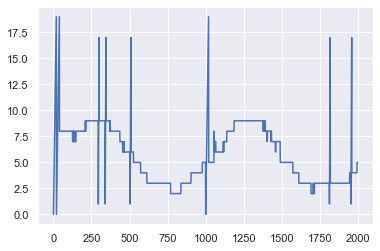

0.6890807017543861
collection rounds: 85
IDST_1


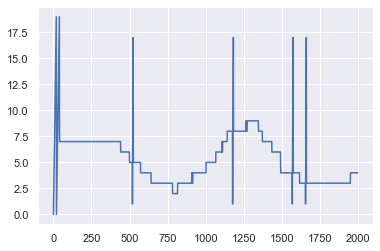

0.7524754385964914
collection rounds: 60
UCB1


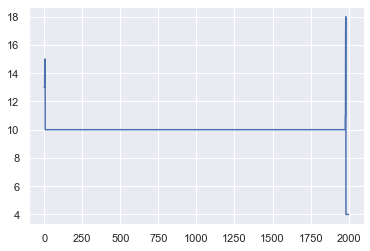

0.22737192982456145
UCBPI


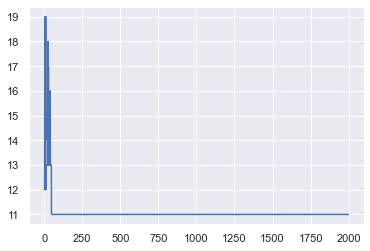

0.08552982456140353
TS


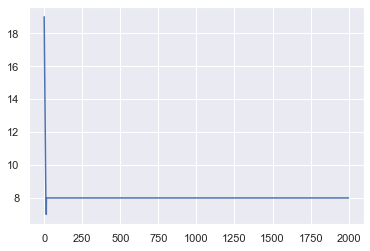

0.08552982456140353
EG


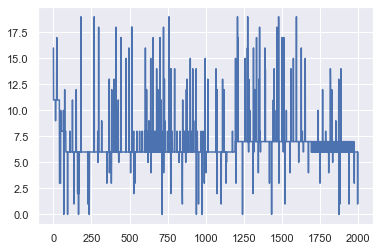

0.08552982456140353


In [8]:
sns.set(font_scale=1)
print('IDS_1')
plt.plot(IDS_1_arm)
plt.show()
print(IDS_1_re[-300:].mean())
print('collection rounds:', IDS_1.collection_rounds)

print('IDST_1')
plt.plot(IDST_1_arm)
plt.show()
print(IDST_1_re[-300:].mean())
print('collection rounds:', IDST_1.collection_rounds)

print('UCB1')
plt.plot(UCB1_arm)
plt.show()
print(UCB1_re[-300:].mean())

print('UCBPI')
plt.plot(UCBPI_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('TS')
plt.plot(TS_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('EG')
plt.plot(EG_arm)
plt.show()
print(UCBPI_re[-300:].mean())